By: Mario Alejandro Castro Lerma for DataCamp

![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [148]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


## Investigation

In [149]:
# dtype check
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [150]:
# val sizes
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


In [151]:
# nan check
penguins_df.isna().sum()

,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


##Preprocessing

In [152]:
# converting sex value to dummies
penguins_df = pd.get_dummies(penguins_df, columns=['sex'])
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
3,36.7,19.3,193.0,3450.0,True,False
4,39.3,20.6,190.0,3650.0,False,True


In [153]:
# scaling numeric values
scaler = StandardScaler()
scaled_penguins_df = scaler.fit_transform(penguins_df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])
scaled_penguins_df = pd.DataFrame(scaled_penguins_df, columns=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])
penguins_df = penguins_df.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], axis=1)
penguins_df = pd.concat([penguins_df, scaled_penguins_df], axis=1)
penguins_df.head()

,sex_FEMALE,sex_MALE,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,False,True,-0.903906,0.790360,-1.425342,-0.566948
1,True,False,-0.830434,0.126187,-1.068577,-0.504847
2,True,False,-0.683490,0.432728,-0.426399,-1.187953
3,True,False,-1.344738,1.096901,-0.569105,-0.939551
4,False,True,-0.867170,1.761074,-0.783164,-0.691149


## Number of clusters analysis

In [154]:
# Choosing number of clusters
inertia = []
for i in range(1,10):
  cluster = KMeans(n_clusters=i, n_init = 'auto', random_state=42).fit(penguins_df)
  inertia.append(cluster.inertia_)

print(inertia)

[1493.9939759036138, 715.8586871250692, 510.4373569821615, 377.0990541734767, 270.6178186481691, 215.62384176213004, 199.46363025192557, 183.40357052214378, 176.25996242990811]


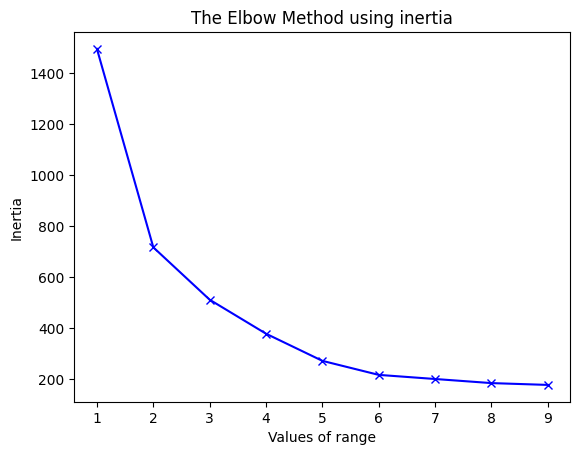

In [155]:
# elbow plot
plt.plot(range(1, 10), inertia, 'bx-')
plt.xlabel('Values of range')
plt.ylabel('Inertia')
plt.title('The Elbow Method using inertia')
plt.show()

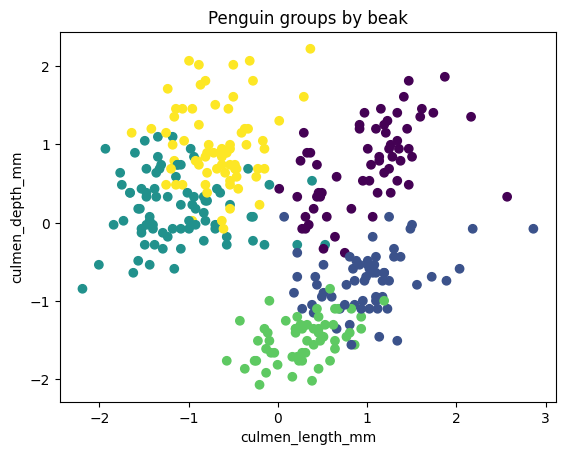

In [156]:
# Cluster visualization
kmeans=KMeans(n_clusters=5, n_init = 'auto', random_state=42).fit(penguins_df)
kmeans.fit(penguins_df)

plt.scatter(penguins_df['culmen_length_mm'], penguins_df['culmen_depth_mm'], c=kmeans.labels_)
plt.xlabel('culmen_length_mm')
plt.ylabel('culmen_depth_mm')
plt.title('Penguin groups by beak')
plt.show()

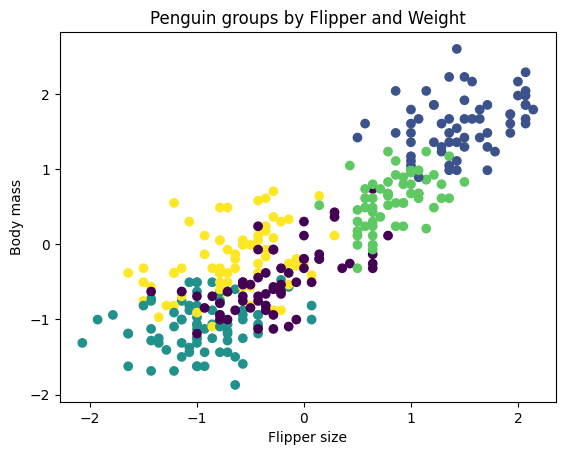

In [157]:
plt.scatter(penguins_df['flipper_length_mm'], penguins_df['body_mass_g'], c=kmeans.labels_)
plt.xlabel('Flipper size')
plt.ylabel('Body mass')
plt.title('Penguin groups by Flipper and Weight')
plt.show()

## Final statistical dataframe

In [158]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_df['label'] = kmeans.labels_
penguins_df.head()

,sex_FEMALE,sex_MALE,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,label
0,False,True,-0.903906,0.790360,-1.425342,-0.566948,4
1,True,False,-0.830434,0.126187,-1.068577,-0.504847,2
2,True,False,-0.683490,0.432728,-0.426399,-1.187953,2
3,True,False,-1.344738,1.096901,-0.569105,-0.939551,2
4,False,True,-0.867170,1.761074,-0.783164,-0.691149,4


In [159]:
# Before reversing scale
stat_penguins = penguins_df.groupby('label')[numeric_columns].mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,1.000045,0.746808,-0.267317,-0.480414
1,1.001551,-0.733134,1.467381,1.587737
2,-1.116385,0.191153,-0.941727,-1.068736
3,0.283365,-1.489322,0.837042,0.587801
4,-0.677539,0.986805,-0.640458,-0.212275


In [160]:
# After reversing scale
stat_penguins = scaler.inverse_transform(stat_penguins)
stat_penguins = pd.DataFrame(stat_penguins, columns=numeric_columns)
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,49.465574,18.614754,197.229508,3819.672131
1,49.473770,15.718033,221.540984,5484.836066
2,37.943210,17.527160,187.777778,3345.987654
3,45.563793,14.237931,212.706897,4679.741379
4,40.332394,19.084507,192.000000,4035.563380


# Project made for datacamp penguin problem by Mario Alejandro Castro Lerma.
